# Delay-curriculum experiment
Does pretraining on shorter delay improve learning?
- 2 orthogonal stimuli
- reward: +1 hold +1 final action 0 otherwise

In [1]:
import sys
import os
import itertools
import numpy as np
import torch as tr
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context('talk')

from utils import *

%load_ext autoreload
%reload_ext autoreload
%autoreload 2


In [2]:
def exp_curr_delay(curr,neps,nseeds):
  """ 
  curr specifies neps for each delay
  """
  assert sum(curr.values()) == 1.0
  reward = -np.ones([nseeds,neps])
  for s in range(nseeds):
    actor = ActorCritic()
    task = PWMTask(stim_set=[(0,1),(1,0)])
    env = Env(actor,task)
    ## curriculum training
    ep = 0
    for delay,prop in curr.items():
      for _ in range(int(neps*prop)):
        data = env.run_pwm_trial(delay=delay,update=True)
        reward[s,ep]=data['reward'][-1]
        ep+=1
  return reward

In [3]:
nseeds = 10
neps = 10000

currL = [
  {5:1.0},
  {1:0.8,5:0.2},
]

L = []
for curr in currL:
  R = exp_curr_delay(curr,neps,nseeds)
  L.append(R)
results = np.array(L)

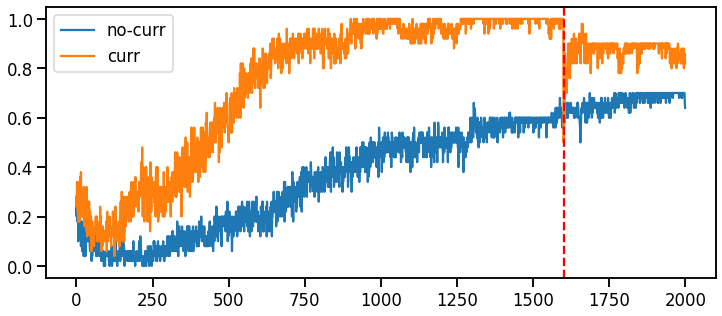

In [4]:
plt.figure(figsize=(12,5))
labL = ['no-curr','curr']
for i in range(len(results)):
  res = results[i]
  M = res.mean(0) 
  S = res.std(0) / np.sqrt(len(res))
  M = M.reshape(-1,5).mean(1)
  plt.plot(M,label=labL[i])
plt.axvline(len(M)*(0.8),c='r',ls='--
            ')
            
plt.legend()
plt.savefig('delay-curriculum')